<a href="https://colab.research.google.com/github/Barde16/Advance-Python/blob/main/Multiclass_Classification_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [73]:
df = pd.read_csv('train_weather.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [74]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [75]:
df.rename(columns={'Precipitation (%)': 'Precipitation','Visibility (km)':'Visibility'},inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation         13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility            13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [77]:
n = df.isnull().sum()
n[n>0]

,0


In [78]:
df.duplicated().sum()

np.int64(0)

In [79]:
x = df.drop('Weather Type',axis=1)
y = df['Weather Type']

In [80]:
x.head()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility,Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [81]:
y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


In [82]:
cat = x.columns[x.dtypes=='object']
num = x.columns[x.dtypes!='object']

In [83]:
print(cat)
print()
print(num)

Index(['Cloud Cover', 'Season', 'Location'], dtype='object')

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Atmospheric Pressure', 'UV Index', 'Visibility'],
      dtype='object')


In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [85]:
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])
cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder())
])

In [86]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [87]:
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder())])

In [88]:
pre = ColumnTransformer([
    ('num',num_pipeline,num),
    ('cat',cat_pipeline,cat)
])

In [89]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Atmospheric Pressure', 'UV Index', 'Visibility'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['Cloud Cover', 'Season', 'Location'], dtype='object'))])

In [90]:
x_scaled  =  pre.fit_transform(x)

In [91]:
x_scaled

array([[-0.29493119,  0.21240351, -0.04808565, ...,  3.        ,
         3.        ,  1.        ],
       [ 1.14303484,  1.35138482, -0.19283608, ...,  3.        ,
         1.        ,  1.        ],
       [ 0.62536707, -0.23328483, -0.40996172, ...,  0.        ,
         1.        ,  2.        ],
       ...,
       [ 0.62536707,  0.41048722, -0.62708737, ...,  2.        ,
         0.        ,  0.        ],
       [-0.92763624,  0.36096629,  0.02428956, ...,  2.        ,
         3.        ,  1.        ],
       [-1.38778537, -1.52082893, -1.42321472, ...,  2.        ,
         0.        ,  2.        ]])

In [92]:
x_scaled  =  pd.DataFrame(x_scaled  ,  columns   =  x.columns)

In [93]:
x_scaled

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility,Location
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,3.0,3.0,1.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,3.0,1.0,1.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,0.0,1.0,2.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,0.0,1.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...
13195,-0.525006,0.261924,0.675666,0.543291,-0.071990,-0.779410,-1.323769,2.0,2.0,2.0
13196,-1.157711,0.360966,-0.916588,-0.959276,1.650675,-0.779410,0.159307,1.0,3.0,0.0
13197,0.625367,0.410487,-0.627087,-0.802759,0.184474,-0.260799,1.049153,2.0,0.0,0.0
13198,-0.927636,0.360966,0.024290,1.263271,-0.579542,-1.038715,-1.027154,2.0,3.0,1.0


In [94]:
# convert target variable into corresponding dimentions for model fitting
from keras.utils import to_categorical

y_new = pd.get_dummies(y,dtype = 'int')
y_new.head()


,Cloudy,Rainy,Snowy,Sunny
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train ,  x_test  ,  y_train  ,  y_test  =  train_test_split(x_scaled  , y_new ,
                                                              test_size  = 0.2  ,
                                                              random_state  = 45)

In [97]:
print(x_train.shape  ,  y_train.shape)
print(x_test.shape  ,  y_test.shape)

(10560, 10) (10560, 4)
(2640, 10) (2640, 4)


In [98]:
y.unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [99]:
## architecture of model
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, BatchNormalization, Dense

In [116]:
nn=Sequential()

## add input layer
nn.add(Dense(units = 300,input_dim=x_train.shape[1], kernel_initializer ='he_uniform'))
nn.add(Dropout(0.3))

nn.add(Dense(units=400))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.3))

nn.add(Dense(units=500))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.1))

nn.add(Dense(units=500))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.1))

nn.add(Dense(units=4, activation='softmax'))




In [117]:
nn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [118]:
nn.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 300)            │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 400)            │       120,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 400)            │         1,600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 500)            │       200,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 4)              │         2,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 582,304 (2.22 MB)

 Trainable params: 579,504 (2.21 MB)

 Non-trainable params: 2,800 (10.94 KB)

In [119]:
from keras.callbacks import EarlyStopping
er = EarlyStopping(monitor='val_loss',patience=5)

In [120]:
## fit model
hist = nn.fit(x_train,y_train,validation_split=0.2,batch_size=256,epochs=100, callbacks = er)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.7260 - loss: 0.7711 - val_accuracy: 0.5597 - val_loss: 1.5452
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8660 - loss: 0.3796 - val_accuracy: 0.6416 - val_loss: 1.0952
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8840 - loss: 0.3100 - val_accuracy: 0.7216 - val_loss: 0.7348
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8881 - loss: 0.2736 - val_accuracy: 0.7950 - val_loss: 0.5714
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8984 - loss: 0.2458 - val_accuracy: 0.8750 - val_loss: 0.2966
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8933 - loss: 0.2594 - val_accuracy: 0.8816 - val_loss: 0.2772
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9026 - loss: 0.2333 - val_accuracy: 0.8930 - val_loss: 0.2330
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8964 - loss: 0.2323 - val_accuracy: 0.8996 - 

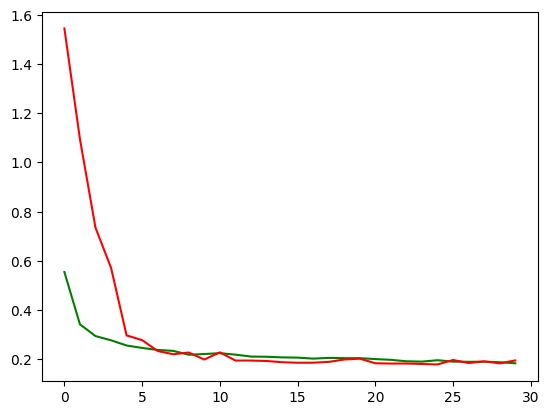

In [122]:
## plot graph
plt.plot(hist.history['loss'], c = 'green')
plt.plot(hist.history['val_loss'], c = 'red')


In [123]:
nn.evaluate(x_train, y_train)

330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9336 - loss: 0.1536


[0.16046778857707977, 0.9317234754562378]

In [124]:
nn.evaluate(x_test, y_test)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9124 - loss: 0.2139


[0.20348556339740753, 0.9147727489471436]

In [125]:
## model evaluation
train_pred_prob = nn.predict(x_train)


330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [126]:
train_pred_prob

array([[1.0281923e-01, 8.0444207e-03, 1.4006891e-03, 8.8773572e-01],
       [4.1773465e-06, 8.3165542e-06, 9.9998605e-01, 1.4542192e-06],
       [8.2678911e-05, 9.9989617e-01, 5.1900497e-07, 2.0628569e-05],
       ...,
       [9.9837625e-01, 4.2707633e-04, 7.9174922e-04, 4.0500693e-04],
       [4.9101457e-02, 3.3615880e-02, 8.5125434e-01, 6.6028275e-02],
       [9.9998081e-01, 1.7818908e-05, 8.8715876e-07, 5.7522550e-07]],
      dtype=float32)

In [133]:
classes = y_new.columns

In [134]:

classes

Index(['Cloudy', 'Rainy', 'Snowy', 'Sunny'], dtype='object')

In [132]:
y_new.head()

,Cloudy,Rainy,Snowy,Sunny
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0


In [138]:
y_train_act = []
for i in range(y_train.shape[0]):
  y_train_act.append(np.argmax(y_train.iloc[i, :]))

In [140]:
y_train_act

[np.int64(3),
 np.int64(2),
 np.int64(1),
 np.int64(3),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(0),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(0),
 np.int64(3),
 np.int64(0),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(3),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(3),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(0),
 np.int64(2),
 np.int64(3),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(0),
 np.int64(3),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.in

In [139]:
y_train_act1 = []
for i in y_train_act:
  y_train_act1.append(classes[i])

In [142]:
print(y_train_act1)

['Sunny', 'Snowy', 'Rainy', 'Sunny', 'Snowy', 'Snowy', 'Snowy', 'Cloudy', 'Cloudy', 'Cloudy', 'Snowy', 'Snowy', 'Snowy', 'Rainy', 'Snowy', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Cloudy', 'Snowy', 'Snowy', 'Sunny', 'Sunny', 'Cloudy', 'Sunny', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Cloudy', 'Cloudy', 'Cloudy', 'Snowy', 'Snowy', 'Cloudy', 'Rainy', 'Snowy', 'Cloudy', 'Snowy', 'Sunny', 'Snowy', 'Snowy', 'Cloudy', 'Sunny', 'Snowy', 'Cloudy', 'Snowy', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Snowy', 'Sunny', 'Cloudy', 'Snowy', 'Snowy', 'Cloudy', 'Cloudy', 'Sunny', 'Snowy', 'Cloudy', 'Snowy', 'Rainy', 'Rainy', 'Snowy', 'Rainy', 'Snowy', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Cloudy', 'Rainy', 'Snowy', 'Sunny', 'Rainy', 'Cloudy', 'Snowy', 'Snowy', 'Snowy', 'Sunny', 'Rainy', 'Cloudy', 'Cloudy', 'Rainy', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Snowy', 'Rainy', 'Rainy', 'Snowy', 'Snowy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy', 'Cloudy', 'Rainy', 'Snowy', 'Sunny', 'Sunny', 'Cloudy',

In [143]:
y_train.head()

,Cloudy,Rainy,Snowy,Sunny
6155,0,0,0,1
5575,0,0,1,0
8391,0,1,0,0
1867,0,0,0,1
1226,0,0,1,0


In [144]:
train_pred = []
for i in train_pred_prob:
  train_pred.append(classes[np.argmax(i)])

In [145]:
print(train_pred)
print(y_train_act1)

['Sunny', 'Snowy', 'Rainy', 'Sunny', 'Snowy', 'Snowy', 'Snowy', 'Cloudy', 'Cloudy', 'Cloudy', 'Snowy', 'Snowy', 'Snowy', 'Rainy', 'Snowy', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Cloudy', 'Snowy', 'Snowy', 'Sunny', 'Sunny', 'Cloudy', 'Sunny', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy', 'Cloudy', 'Snowy', 'Snowy', 'Cloudy', 'Rainy', 'Snowy', 'Cloudy', 'Snowy', 'Sunny', 'Snowy', 'Snowy', 'Cloudy', 'Sunny', 'Snowy', 'Cloudy', 'Snowy', 'Rainy', 'Sunny', 'Rainy', 'Snowy', 'Cloudy', 'Snowy', 'Sunny', 'Rainy', 'Snowy', 'Snowy', 'Cloudy', 'Cloudy', 'Sunny', 'Snowy', 'Cloudy', 'Snowy', 'Snowy', 'Snowy', 'Snowy', 'Rainy', 'Snowy', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Cloudy', 'Rainy', 'Snowy', 'Sunny', 'Rainy', 'Cloudy', 'Rainy', 'Snowy', 'Snowy', 'Sunny', 'Rainy', 'Cloudy', 'Cloudy', 'Rainy', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Snowy', 'Rainy', 'Rainy', 'Snowy', 'Snowy', 'Rainy', 'Rainy', 'Rainy', 'Cloudy', 'Cloudy', 'Rainy', 'Snowy', 'Sunny', 'Sunny', 'Cloudy', '

In [146]:
from sklearn.metrics import classification_report, confusion_matrix

In [147]:
print(classification_report(y_train_act1, train_pred))

              precision    recall  f1-score   support

      Cloudy       0.97      0.87      0.92      2611
       Rainy       0.90      0.95      0.92      2638
       Snowy       0.92      0.97      0.94      2655
       Sunny       0.95      0.93      0.94      2656

    accuracy                           0.93     10560
   macro avg       0.93      0.93      0.93     10560
weighted avg       0.93      0.93      0.93     10560



In [148]:
confusion_matrix(y_train_act1, train_pred)

array([[2283,  156,   82,   90],
       [  42, 2505,   66,   25],
       [  15,   51, 2568,   21],
       [  23,   71,   79, 2483]])

In [154]:
## check for testing
y_test_act = []
for i in range(y_test.shape[0]):
  y_test_act.append(classes[np.argmax(y_test.iloc[i, :])])

In [155]:
print(y_test_act)

['Rainy', 'Cloudy', 'Rainy', 'Cloudy', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Cloudy', 'Sunny', 'Snowy', 'Rainy', 'Sunny', 'Sunny', 'Cloudy', 'Rainy', 'Rainy', 'Rainy', 'Cloudy', 'Sunny', 'Cloudy', 'Snowy', 'Snowy', 'Rainy', 'Sunny', 'Rainy', 'Rainy', 'Rainy', 'Snowy', 'Sunny', 'Snowy', 'Cloudy', 'Sunny', 'Snowy', 'Sunny', 'Snowy', 'Snowy', 'Cloudy', 'Sunny', 'Snowy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Snowy', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Cloudy', 'Snowy', 'Cloudy', 'Snowy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy', 'Snowy', 'Sunny', 'Rainy', 'Snowy', 'Rainy', 'Cloudy', 'Sunny', 'Snowy', 'Rainy', 'Cloudy', 'Snowy', 'Rainy', 'Snowy', 'Sunny', 'Snowy', 'Rainy', 'Snowy', 'Cloudy', 'Sunny', 'Cloudy', 'Snowy', 'Cloudy', 'Cloudy', 'Snowy', 'Snowy', 'Cloudy', 'Cloudy', 'Sunny', 'Snowy', 'Rainy', 'Sunny', 'Snow

In [156]:
y_test.head()

,Cloudy,Rainy,Snowy,Sunny
8849,0,1,0,0
11832,1,0,0,0
7733,0,1,0,0
5032,1,0,0,0
6497,0,1,0,0


In [157]:
test_pred_prob = nn.predict(x_test)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [158]:
test_pred_prob

array([[4.6146038e-04, 9.9947500e-01, 2.5280408e-06, 6.0948216e-05],
       [9.8832601e-01, 1.1635623e-02, 1.6424780e-06, 3.6740323e-05],
       [8.0172485e-06, 9.9999046e-01, 2.1789128e-07, 1.2602494e-06],
       ...,
       [2.8424998e-04, 9.9970394e-01, 3.0848214e-06, 8.6983964e-06],
       [4.4874935e-09, 8.4419085e-09, 1.0000000e+00, 5.9643055e-09],
       [9.9992692e-01, 5.0952658e-05, 7.2589769e-06, 1.4874553e-05]],
      dtype=float32)

In [159]:
test_pred = []
for i in test_pred_prob:
  test_pred.append(classes[np.argmax(i)])

In [162]:
print(test_pred)
print(y_test_act)

['Rainy', 'Cloudy', 'Rainy', 'Cloudy', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Snowy', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Cloudy', 'Sunny', 'Snowy', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Cloudy', 'Sunny', 'Sunny', 'Snowy', 'Snowy', 'Rainy', 'Sunny', 'Rainy', 'Rainy', 'Rainy', 'Snowy', 'Sunny', 'Snowy', 'Snowy', 'Sunny', 'Snowy', 'Sunny', 'Snowy', 'Snowy', 'Cloudy', 'Sunny', 'Snowy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Sunny', 'Snowy', 'Snowy', 'Sunny', 'Rainy', 'Sunny', 'Snowy', 'Cloudy', 'Snowy', 'Cloudy', 'Snowy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy', 'Snowy', 'Rainy', 'Rainy', 'Snowy', 'Rainy', 'Cloudy', 'Sunny', 'Snowy', 'Rainy', 'Cloudy', 'Snowy', 'Rainy', 'Snowy', 'Sunny', 'Snowy', 'Rainy', 'Snowy', 'Cloudy', 'Sunny', 'Cloudy', 'Snowy', 'Cloudy', 'Cloudy', 'Snowy', 'Snowy', 'Cloudy', 'Cloudy', 'Sunny', 'Snowy', 'Rainy', 'Sunny', 'Snowy',

In [163]:
print(classification_report(y_test_act, test_pred))

              precision    recall  f1-score   support

      Cloudy       0.95      0.87      0.91       689
       Rainy       0.89      0.93      0.91       662
       Snowy       0.89      0.95      0.92       645
       Sunny       0.93      0.91      0.92       644

    accuracy                           0.91      2640
   macro avg       0.92      0.92      0.91      2640
weighted avg       0.92      0.91      0.91      2640



In [164]:
confusion_matrix(y_test_act, test_pred)

array([[596,  32,  34,  27],
       [ 18, 616,  19,   9],
       [  2,  18, 615,  10],
       [  9,  23,  24, 588]])

In [ ]:
### apply on unseen data